In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import networkx as nx
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

In [4]:
# Load member edges data
df = pd.read_csv('member-edges.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
df.head(5)

member1    member2  weight
0  198737924  220654721       1
1  198737924  208201738       1
2  198737924   88664332       1
3  198737924    8640526       1
4  198737924   56356372       1

In [5]:
# Sample 1000 members
df = df[0 : 1000]

c:\Users\olivi\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


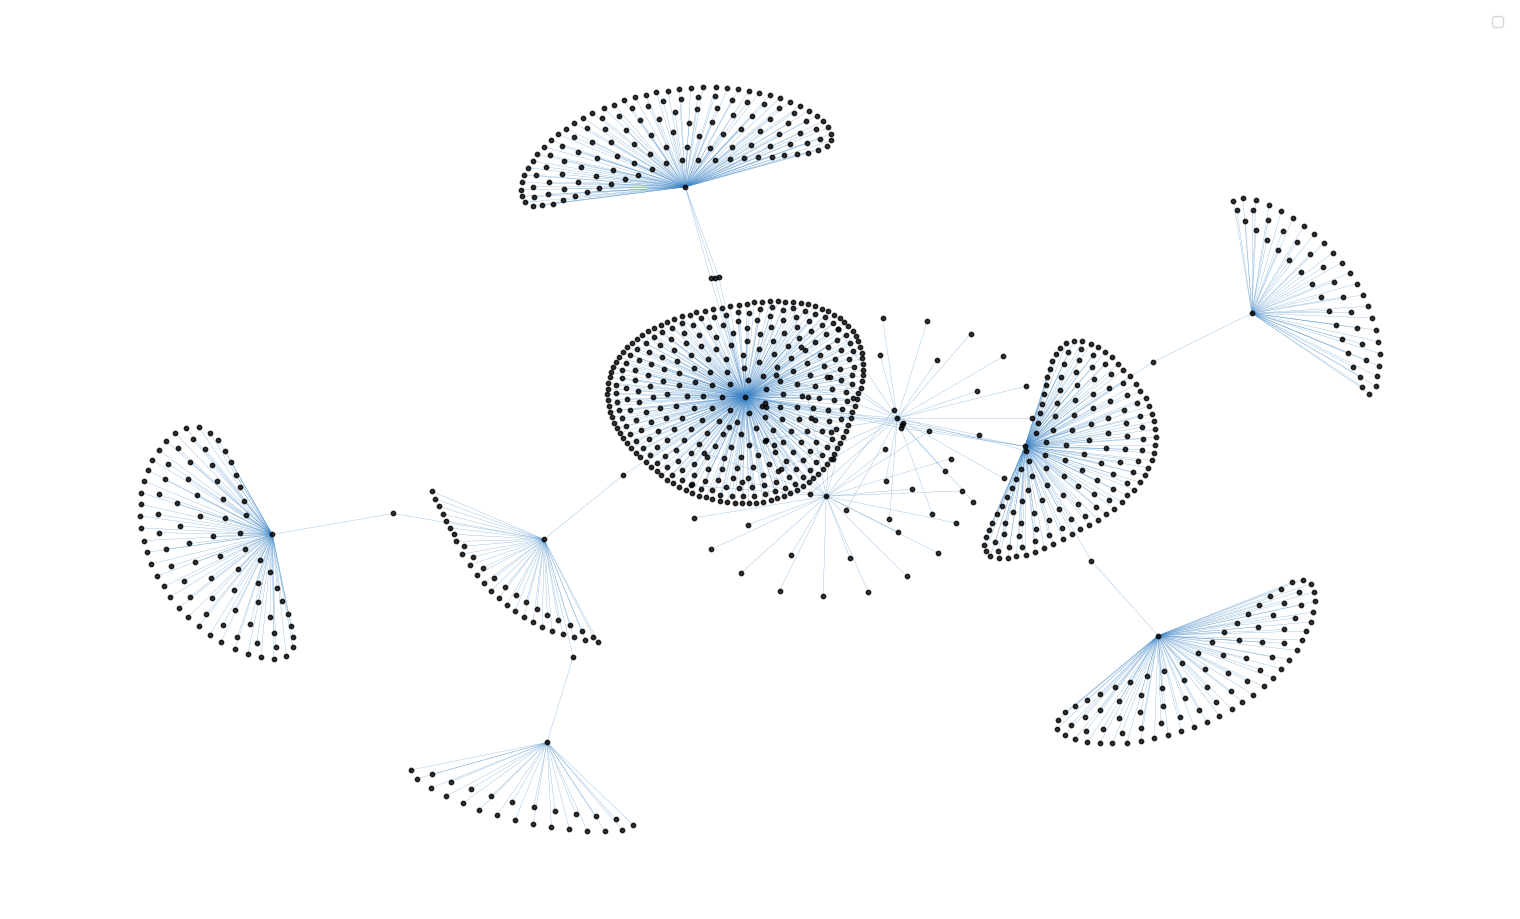

In [6]:
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'k', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='#3d85c6')

plt.legend()
plt.show()

In [7]:
# Create the graph
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using=nx.Graph())

# Get the degree of each node
degree = G.degree()

# List to store members with 10 or more connections
members_with_10_or_more_connections = []

# Iterate through nodes and check their degree
for node, deg in degree:
    if deg >= 10:
        members_with_10_or_more_connections.append(node)

print("Members with 10 or more connections:", members_with_10_or_more_connections)


Members with 10 or more connections: [198737924, 73498632, 182943766, 216072216, 183566364, 234684445, 200114206, 200769567, 13631520, 226754592]


In [8]:
import pandas as pd

# Load meta-groups data
meta_groups_df = pd.read_csv('meta-groups.csv')

# Filter meta-groups dataframe to only include groups where the organizer_id is in the list of members with 10 or more connections
organized_groups = meta_groups_df[meta_groups_df['organizer_id'].isin(members_with_10_or_more_connections)]

# Display the result
print("Groups organized by members with 10 or more connections:")
print(organized_groups[['group_id', 'group_name', 'organizer_id']])


Groups organized by members with 10 or more connections:
Empty DataFrame
Columns: [group_id, group_name, organizer_id]
Index: []


# Top 3 degree centrality

c:\Users\olivi\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


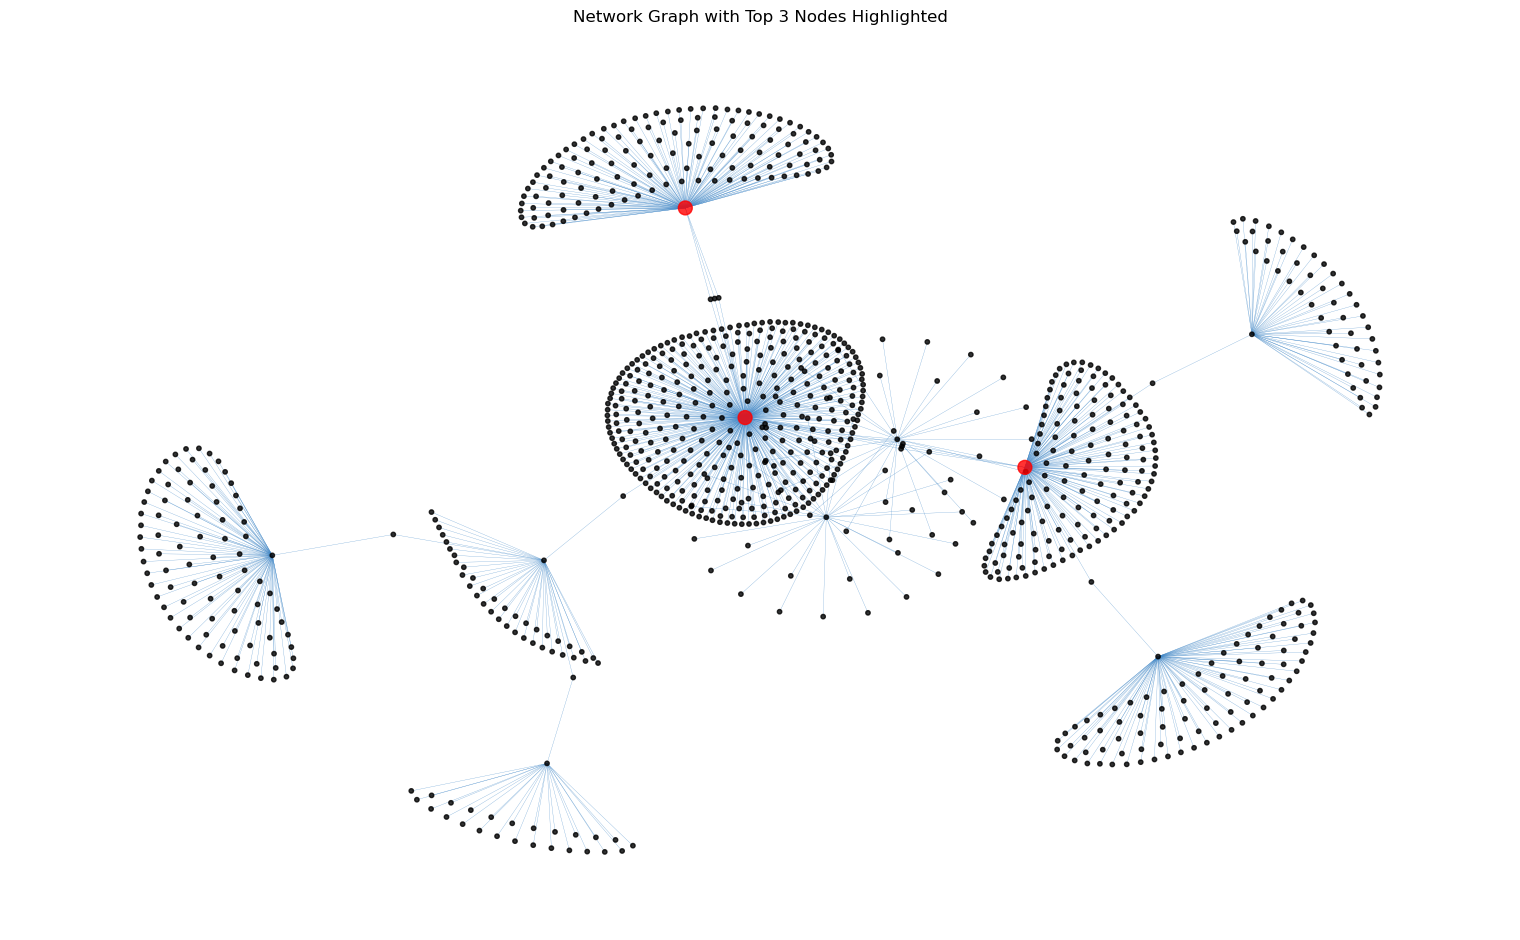

In [9]:
import numpy as np

# Create the graph
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using=nx.Graph())

# Get the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Extract top 3 nodes with highest degree centrality
top_3_nodes = sorted_nodes[:3]

# Set node color based on degree centrality
node_colors = ['red' if node in top_3_nodes else 'k' for node in G.nodes()]

# Set node size based on degree centrality
node_sizes = [100 if node in top_3_nodes else 10 for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 9), dpi=100)
nx.draw(G, pos, alpha=0.8, node_color=node_colors, node_size=node_sizes, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='#3d85c6')
plt.title('Network Graph with Top 3 Nodes Highlighted')
plt.show()


In [10]:
# Load meta-members data
meta_members_df = pd.read_csv('meta-members.csv')

# Filter meta-members dataframe to only include members in top_3_nodes
top_3_members = meta_members_df[meta_members_df['member_id'].isin(top_3_nodes)]

# Display the names of top 3 members
print("Names of top 3 members:")
print(top_3_members[['member_id', 'name']])

Names of top 3 members:
       member_id           name
18313  216072216     Giles Ward
21451  226754592  Thomas Hulley
23652  234684445  Nathan Hudson


# Top 3 closeness centrality

c:\Users\olivi\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


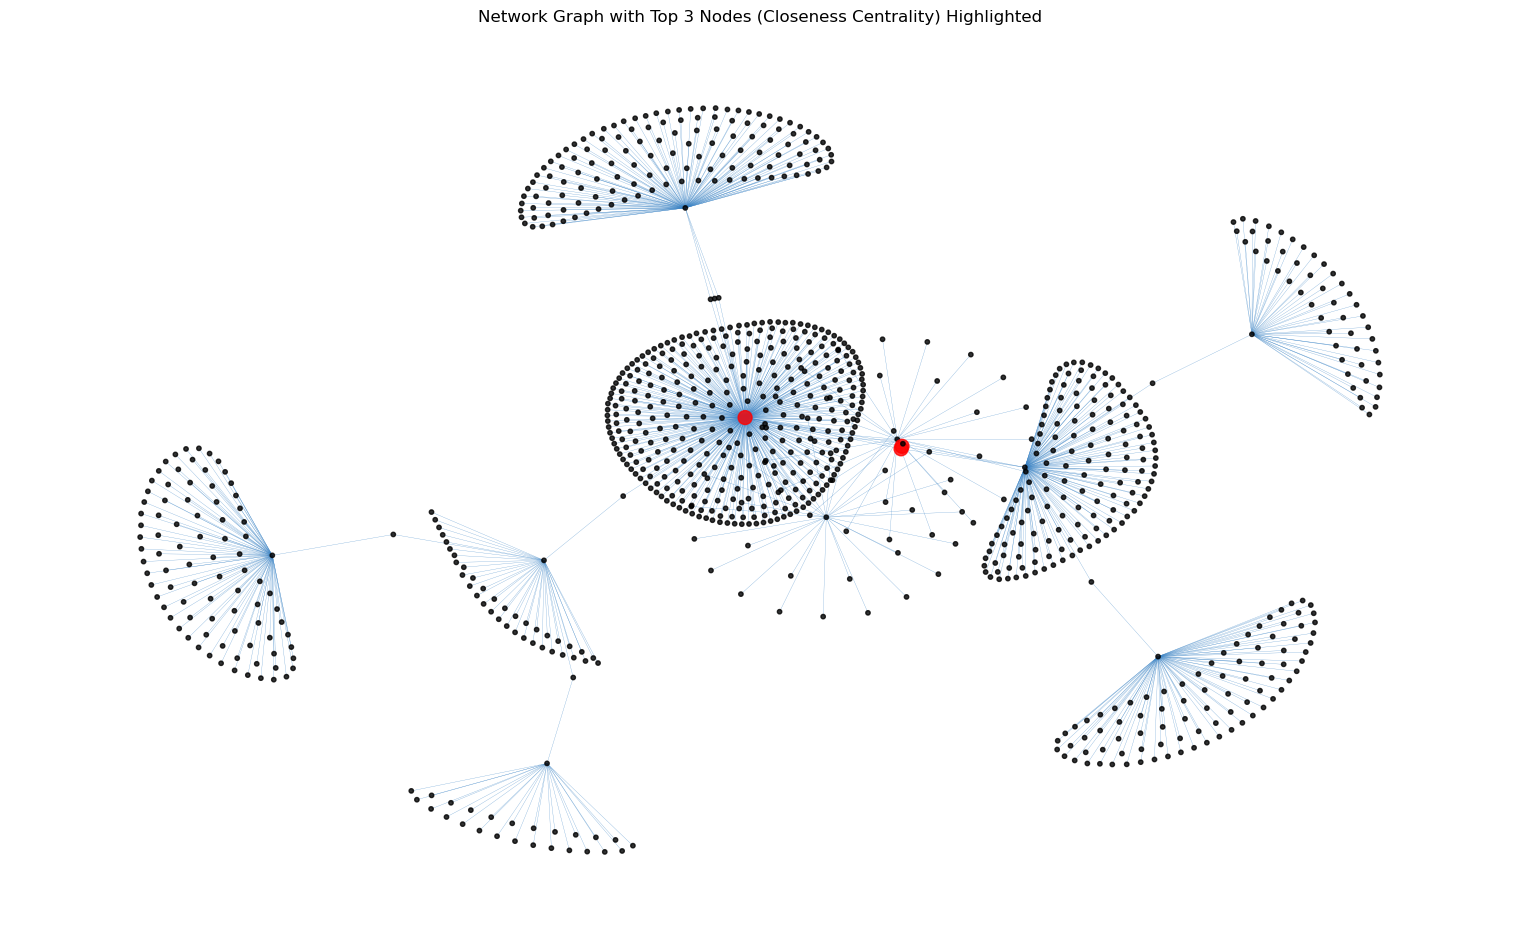

In [11]:
# Create the graph
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using=nx.Graph())

# Get the closeness centrality of each node
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by closeness centrality in descending order
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Extract top 3 nodes with highest closeness centrality
top_3_nodes = sorted_nodes[:3]

# Set node color based on closeness centrality
node_colors = ['red' if node in top_3_nodes else 'k' for node in G.nodes()]

# Set node size based on closeness centrality
node_sizes = [100 if node in top_3_nodes else 10 for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 9), dpi=100)
nx.draw(G, pos, alpha=0.8, node_color=node_colors, node_size=node_sizes, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='#3d85c6')
plt.title('Network Graph with Top 3 Nodes (Closeness Centrality) Highlighted')
plt.show()


In [12]:
# Filter meta-members dataframe to only include members in top_3_nodes
top_3_members = meta_members_df[meta_members_df['member_id'].isin(top_3_nodes)]

# Display the names of top 3 members
print("Names of top 3 members:")
print(top_3_members[['member_id', 'name']])

Names of top 3 members:
       member_id              name
6368   108448302  Craig McQuistion
12336  195150281  William Etcetera
23652  234684445     Nathan Hudson


# Top 3 betweenness centrality

c:\Users\olivi\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


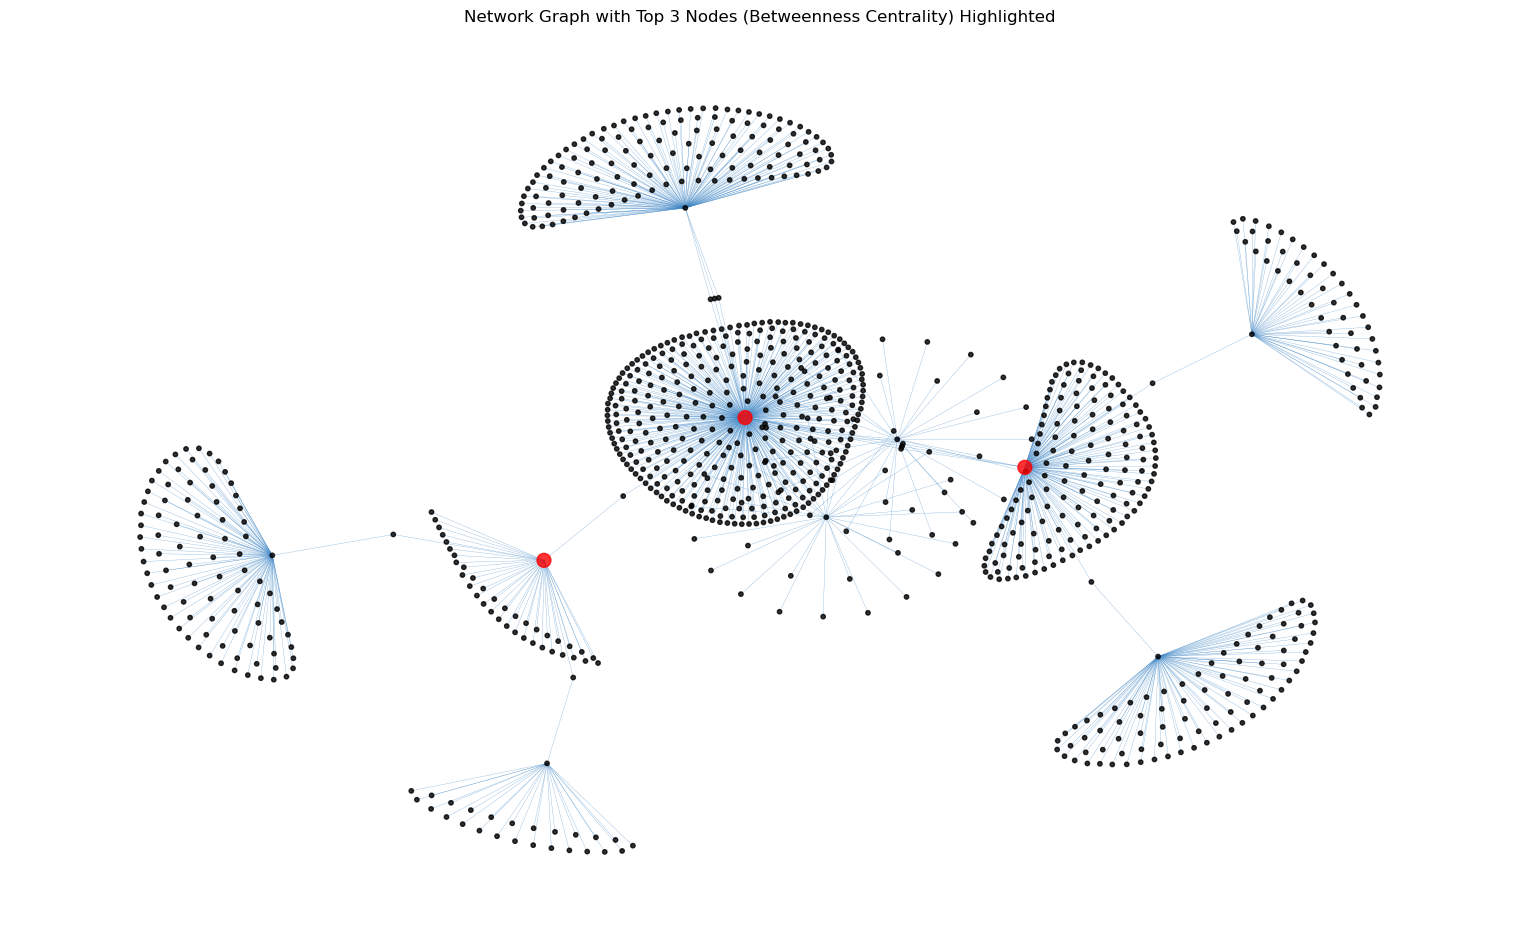

In [13]:
# Create the graph
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using=nx.Graph())

# Get the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality in descending order
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Extract top 3 nodes with highest betweenness centrality
top_3_nodes = sorted_nodes[:3]

# Set node color based on betweenness centrality
node_colors = ['red' if node in top_3_nodes else 'k' for node in G.nodes()]

# Set node size based on betweenness centrality
node_sizes = [100 if node in top_3_nodes else 10 for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 9), dpi=100)
nx.draw(G, pos, alpha=0.8, node_color=node_colors, node_size=node_sizes, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='#3d85c6')
plt.title('Network Graph with Top 3 Nodes (Betweenness Centrality) Highlighted')
plt.show()


In [14]:
# Filter meta-members dataframe to only include members in top_3_nodes
top_3_members = meta_members_df[meta_members_df['member_id'].isin(top_3_nodes)]

# Display the names of top 3 members
print("Names of top 3 members:")
print(top_3_members[['member_id', 'name']])

Names of top 3 members:
       member_id           name
2704    13631520      Jeffrey J
21451  226754592  Thomas Hulley
23652  234684445  Nathan Hudson


# Top 3 eigenvector centrality

c:\Users\olivi\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


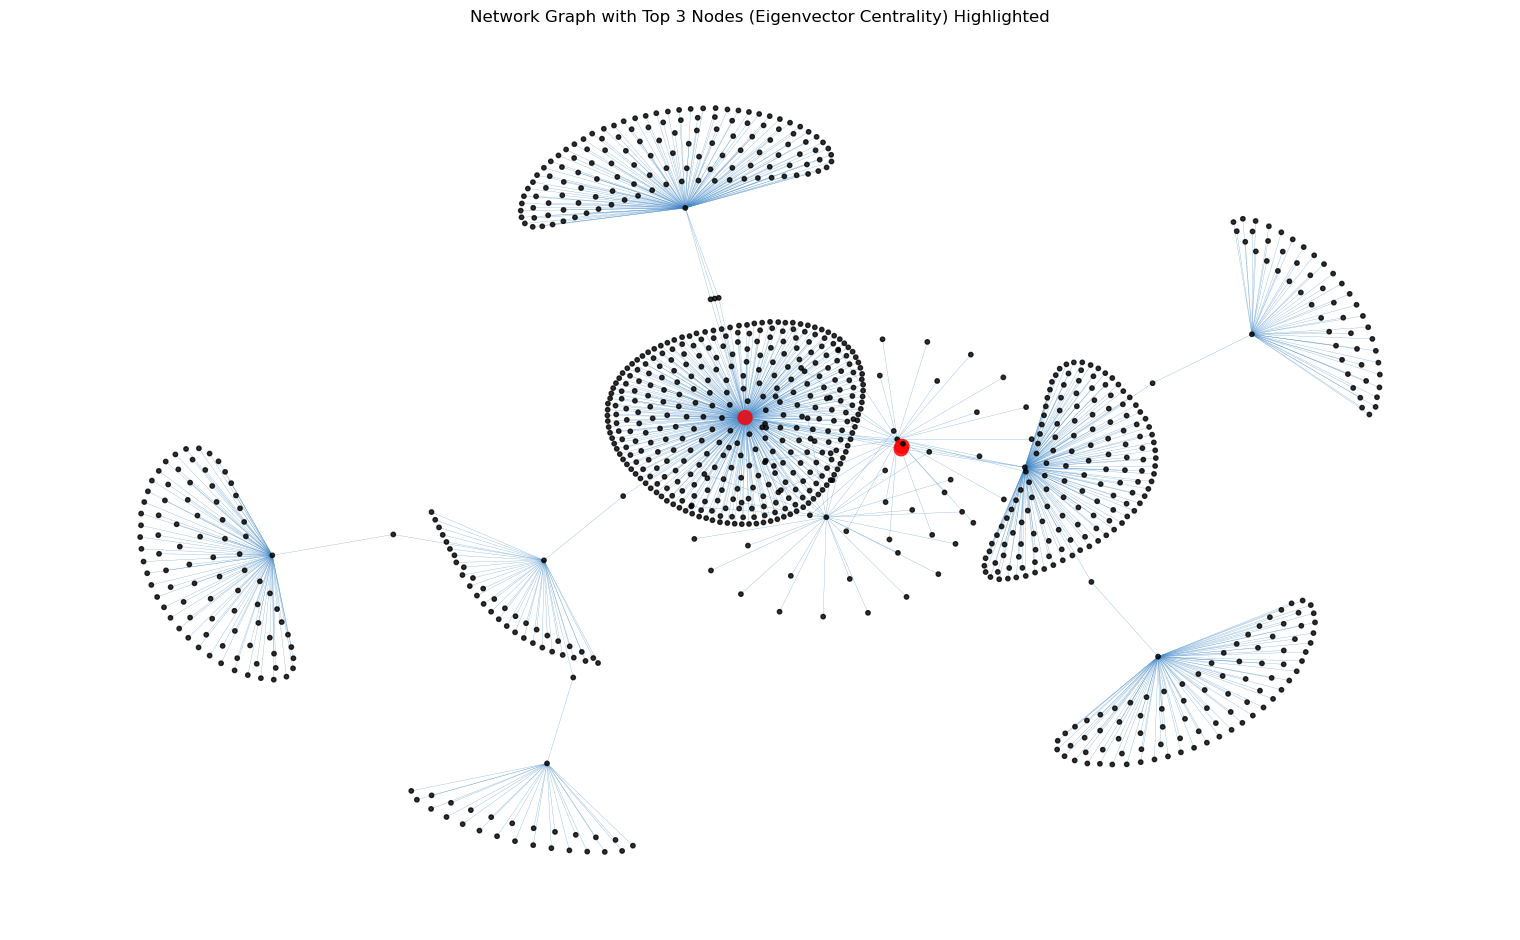

In [15]:
# Create the graph
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using=nx.Graph())

# Get the eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes by eigenvector centrality in descending order
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Extract top 3 nodes with highest eigenvector centrality
top_3_nodes = sorted_nodes[:3]

# Set node color based on eigenvector centrality
node_colors = ['red' if node in top_3_nodes else 'k' for node in G.nodes()]

# Set node size based on eigenvector centrality
node_sizes = [100 if node in top_3_nodes else 10 for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 9), dpi=100)
nx.draw(G, pos, alpha=0.8, node_color=node_colors, node_size=node_sizes, with_labels=False, font_size=6, width=0.2, cmap=cmap, edge_color='#3d85c6')
plt.title('Network Graph with Top 3 Nodes (Eigenvector Centrality) Highlighted')
plt.show()


In [16]:
# Filter meta-members dataframe to only include members in top_3_nodes
top_3_members = meta_members_df[meta_members_df['member_id'].isin(top_3_nodes)]

# Display the names of top 3 members
print("Names of top 3 members:")
print(top_3_members[['member_id', 'name']])

Names of top 3 members:
       member_id              name
6368   108448302  Craig McQuistion
12336  195150281  William Etcetera
23652  234684445     Nathan Hudson
